In [1]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# change to your suite-id to pick up the required file
runid='cq988'
datafile='/home/vagrant/cylc-run/u-'+runid+'/work/1/atmos/atmosa.pa19810901_00'

In [3]:
# constraint on time to get 2nd radiation timestep
tconstr=iris.Constraint(time=lambda cell: cell.point.hour == 2)

In [4]:
# load all TOA components
isw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s01i207') & tconstr])
osw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s01i208') & tconstr])
olw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s02i205') & tconstr])

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/pp.py:1562: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t1 = cftime.datetime(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/pp.py:1597: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  self._t2 = cftime.datetime(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cf_units/__init__.py:402: UserWarning: has_year_zero kwarg ignored for idealized calendars (always True)
  dates = np.array([dt and dt.replace(microsecond=0) for dt in dates])
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [5]:
# make cube to store net downward TOA flux
toa=isw.copy()
toa.data=np.zeros(toa.data.shape)

# calculate TOA flux
toa.data=isw.data - (osw.data + olw.data)

toa.rename('toa_net_downward_radiative_flux')

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/ubuntu/miniconda3/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


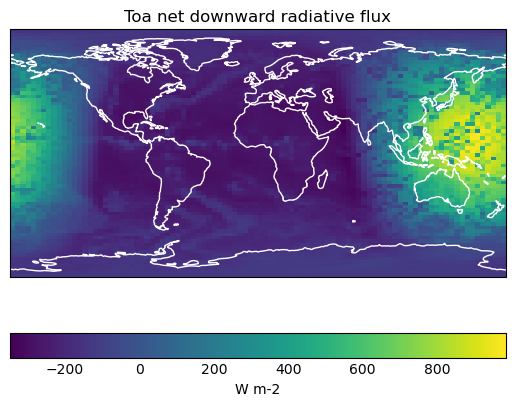

In [6]:
qplt.pcolormesh(toa)
plt.gca().coastlines(color='w')

In [7]:
# output to netCDF
iris.save(toa,'/home/vagrant/iris_Task124_TOA.nc',netcdf_format='NETCDF4')